# Foundations of Artificial Intelligence and Machine Learning
## A Program by IIIT-H and TalentSprint
#### To be done in the Lab


The objective of this experiment is to understand MultiLayer Perceptron(MLP).

In this experiment we will use famous Iris data set.This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. 

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 


#### Data Attributes

  1. sepal length in cm 
  2. sepal width in cm 
  3. petal length in cm 
  4. petal width in cm 
  5. class: 
     -- Iris Setosa  
     -- Iris Versicolour 
     -- Iris Virginica

**MultiLayer Perceptron **

An MLP can be viewed as a logistic regression classifier where the input is first transformed using a learnt non-linear transformation \Phi. This transformation projects the input data into a space where it becomes linearly separable. This intermediate layer is referred to as a hidden layer. A single hidden layer is sufficient to make MLPs a universal approximator.

In [1]:
# Load required libraries
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.neural_network import MLPClassifier
import numpy as np

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from Utils import *


Let us load the iris dataset from sklearn datasets package

In [2]:
# Load the iris dataset
iris = datasets.load_iris()

# Create our X and y data
X = iris.data
y = iris.target

In [3]:
# View ten observations of our y data
y[45:55]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [4]:
# View the corresponding x data.
X[45:55]

array([[4.8, 3. , 1.4, 0.3],
       [5.1, 3.8, 1.6, 0.2],
       [4.6, 3.2, 1.4, 0.2],
       [5.3, 3.7, 1.5, 0.2],
       [5. , 3.3, 1.4, 0.2],
       [7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [6.5, 2.8, 4.6, 1.5]])

 Split the data into 70% training data and 30% test data

In [19]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Now let us train the scaler, which standarizes all the features to have mean=0 and unit variance

In [6]:

sc = StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
sc = StandardScaler()

In [23]:
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
# Apply the scaler to the X training data
X_train_std = sc.transform(X_train)

# Apply the SAME scaler to the X test data
X_test_std = sc.transform(X_test)

In [20]:
X_train

array([[5.2, 4.1],
       [6.4, 3.1],
       [4.8, 3. ],
       [6.9, 3.1],
       [5.8, 2.7],
       [5.8, 2.7],
       [5.1, 3.5],
       [7.3, 2.9],
       [4.9, 3.1],
       [4.6, 3.6],
       [6. , 3.4],
       [5.4, 3.4],
       [5. , 3.5],
       [5.4, 3. ],
       [5.5, 2.5],
       [5. , 2. ],
       [6.5, 3. ],
       [6.3, 2.3],
       [6. , 2.7],
       [4.6, 3.4],
       [4.8, 3.1],
       [6.5, 3. ],
       [5.1, 3.8],
       [5.2, 3.5],
       [6.5, 3.2],
       [5.6, 3. ],
       [7.9, 3.8],
       [5.6, 3. ],
       [7.2, 3.2],
       [6. , 2.2],
       [7. , 3.2],
       [6.3, 2.9],
       [5.1, 3.3],
       [6.9, 3.2],
       [5.1, 3.8],
       [5.5, 2.4],
       [7.7, 3.8],
       [4.9, 3. ],
       [6.3, 2.5],
       [5.3, 3.7],
       [5.8, 4. ],
       [5.1, 3.4],
       [6.3, 2.8],
       [6.4, 2.8],
       [5.8, 2.7],
       [6.5, 3. ],
       [5.7, 3.8],
       [5. , 3.2],
       [7.4, 2.8],
       [5.5, 2.4],
       [6.2, 2.8],
       [6.4, 2.9],
       [5.7,

In [21]:
X_train_std

array([[-0.89235109,  0.9296315 , -1.32034226, -1.36582471],
       [ 1.50398815, -0.06386781,  1.17148014,  1.15482311],
       [ 0.06618461,  0.43288185,  0.54852454,  0.75682609],
       [-1.37161893,  0.43288185, -1.26370993, -1.36582471],
       [ 0.54545245, -0.31224264,  1.00158316,  0.75682609],
       [ 0.78508638, -0.06386781,  1.11484781,  1.28748879],
       [ 0.54545245,  0.68125667,  1.22811247,  1.68548582],
       [ 0.54545245, -0.8089923 ,  0.60515687,  0.75682609],
       [-1.01216805, -0.06386781, -1.26370993, -1.36582471],
       [ 0.42563549,  0.9296315 ,  0.8883185 ,  1.42015446],
       [-0.77253412,  1.17800633, -1.32034226, -1.36582471],
       [-0.17344932, -0.31224264,  0.20873058,  0.09349771],
       [-1.13198501, -1.55411679, -0.30096037, -0.30449931],
       [ 1.86343903, -0.56061747,  1.28474479,  0.88949176],
       [-0.77253412, -0.8089923 ,  0.0388336 ,  0.22616339],
       [ 1.0247203 , -1.30574196,  1.11484781,  0.75682609],
       [ 1.26435422,  0.

In [8]:
# Calling the MLP Classifier instance
clf = MLPClassifier(activation='logistic', alpha=1e-05, batch_size=6, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(7, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


In [9]:
# Trying to fit the data into the model
clf.fit(X_train_std, y_train)

MLPClassifier(activation='logistic', alpha=1e-05, batch_size=6, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(7, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [10]:
# Apply the trained perceptron on the X data to make predicts for the y test data
y_pred = clf.predict(X_test_std)

In [11]:
# View the accuracy of the model, which is: 1 - (observations predicted wrong / total observations)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.96


In [12]:
clf.coefs_

[array([[  2.7064643 ,   9.48198695,  15.34822468,  18.81879634,
           4.41410053,   2.68305702,  -1.90073578],
        [-18.80544675, -34.36752738,  -7.98321907, -34.37207255,
           0.50836999,   0.45430683,  13.82620134],
        [  7.45758495,  20.69880673,  19.16731719,  31.46536307,
          -0.20659538, -24.37005678,  -9.27040295],
        [  5.03222378,  15.80812025,  19.29737378,  28.61593043,
          25.2504781 , -13.25369602, -10.38662228]]),
 array([[ -0.48998963,   5.41880753,   7.77025435],
        [ -7.52777546, -16.53978949,  17.9476318 ],
        [ 10.19395853,   7.12472012,  -6.40481856],
        [-10.37242176, -25.79868355,  21.94990931],
        [ 18.8885387 ,  17.64484384, -11.85066147],
        [ 15.81882434,  58.53008287, -19.62424196],
        [ 15.30227746,  35.40220884, -24.85254763]]),
 array([[ -7.62877032,  -9.51607159,  16.822712  ],
        [  9.65707162,  20.3202363 , -30.36482349],
        [-74.74264001,  22.75862199,  52.22753534]])]

In [13]:
clf.classes_

array([0, 1, 2])

In [14]:
for trial in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
    clf = MLPClassifier(activation='logistic', alpha=1e-05, batch_size=6, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(7, ), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
    clf.fit(X_train_std, y_train)
    y_pred = clf.predict(X_test_std)
    print(y_pred)
    print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

[0 0 2 1 2 2 2 0 2 2 0 1 2 1 0 2 1 1 2 0 1 0 2 2 2 1 1 2 2 1 2 2 2 0 2 0 0
 1 1 0 1 1 1 0 1]
Accuracy: 0.93
[1 1 0 1 0 1 0 2 1 1 0 1 0 1 2 2 2 1 0 0 0 1 2 2 0 2 0 0 2 2 1 2 0 2 1 1 1
 2 1 1 1 0 1 0 0]
Accuracy: 0.96
[1 0 2 0 2 0 2 1 1 1 2 1 0 0 1 1 1 0 0 1 2 2 1 2 1 2 0 2 1 0 2 0 0 2 0 2 1
 0 1 1 1 0 2 1 2]
Accuracy: 0.96
[0 2 2 0 2 0 1 1 2 2 0 2 1 1 1 0 1 2 1 0 0 1 1 2 0 0 1 2 2 1 1 2 1 1 0 2 1
 0 0 0 0 1 1 2 2]
Accuracy: 0.96
[1 0 0 0 1 0 2 2 1 2 0 0 1 2 1 1 2 0 0 2 2 0 0 1 0 2 1 2 2 0 2 1 0 2 2 0 0
 2 0 2 0 2 0 2 0]
Accuracy: 0.91
[0 1 0 2 2 2 1 0 2 1 0 1 1 1 0 1 0 2 1 2 2 2 1 0 2 1 2 1 1 0 0 0 2 2 1 0 0
 1 0 2 0 1 2 2 1]
Accuracy: 0.98
[0 0 1 0 2 1 0 2 1 1 2 2 1 0 0 2 2 2 1 2 1 1 0 0 0 2 2 1 1 0 1 0 0 0 2 0 0
 2 2 1 2 0 0 0 2]
Accuracy: 0.98
[0 1 2 0 1 2 2 0 2 2 1 0 1 1 0 1 0 1 1 1 2 2 0 2 2 1 1 2 0 0 0 2 0 2 2 2 0
 1 2 0 0 1 2 2 0]
Accuracy: 0.98
[2 2 0 2 1 2 1 0 2 1 0 2 1 1 2 2 1 0 0 1 1 2 2 1 0 1 2 2 2 0 0 2 0 2 2 2 0
 1 0 1 1 0 1 1 1]
Accuracy: 0.96
[0 2 2 1 0 0 0 2 0 1 0 2 0 0

As you can see this is performing much better; however a few times the neural netweok is getting caught in the local minima

In [16]:
xx, yy, zz, aa = np.mgrid[-0:10:0.5, 0:10:0.5, 0:10:0.5, 0:10:0.5]
grid = np.c_[xx.ravel(), yy.ravel(), zz.ravel(), aa.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

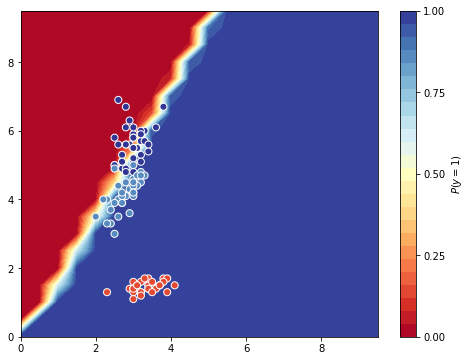

In [17]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8, 6))
xx, yy = np.mgrid[-0:10:0.5, 0:10:0.5]
contour = ax.contourf(xx, yy, probs[:,:, 0, 0].reshape(20,20), 25, cmap="RdYlBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_train[:,1], X_train[:, 2], c=y_train[:], s=50,
           cmap="RdYlBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
plt.show()

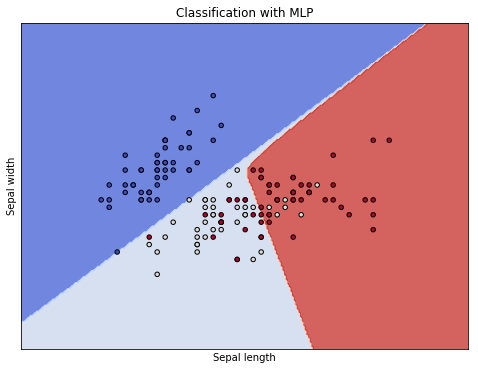

In [18]:

# Take the first two features. TODO - Try combinations of two features
X = iris.data[:, :2]
y = iris.target

# we create an instance of MLP and fit out data. We do not scale our
# data since we want to plot the vectors
models = [clf]
models = [clf.fit(X, y) for clf in models]

# title for the plots
titles = 'Classification with MLP'

# Set-up 2x2 grid for plotting.

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)


f, ax = plt.subplots(figsize=(8, 6))

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(titles)

plt.show()